In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import sys
sys.path.append('/content/drive/MyDrive/DL Lab 2')

In [36]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [37]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 7 3 3 9 5 9 0 6 7]


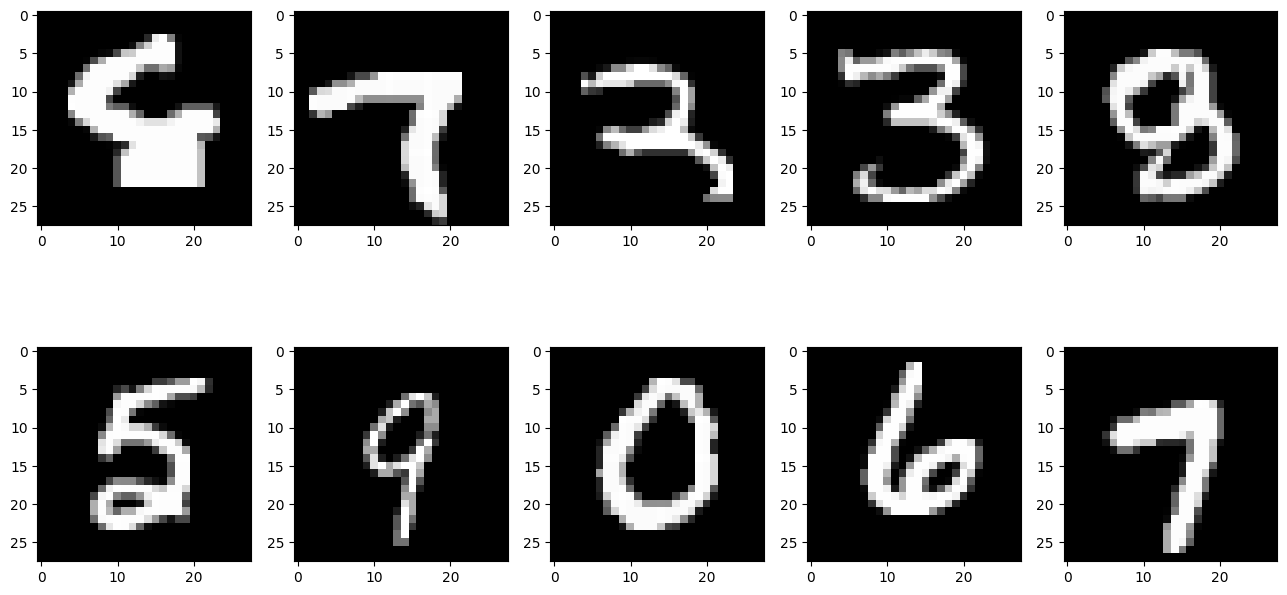

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [38]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [39]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [41]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8422 - loss: 0.5269
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9593 - loss: 0.1353
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9716 - loss: 0.0942
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0776
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9819 - loss: 0.0559
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9828 - loss: 0.0530
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0422
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9888 - loss: 0.0351
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0326
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0279


Plot the loss and accuracy graphs

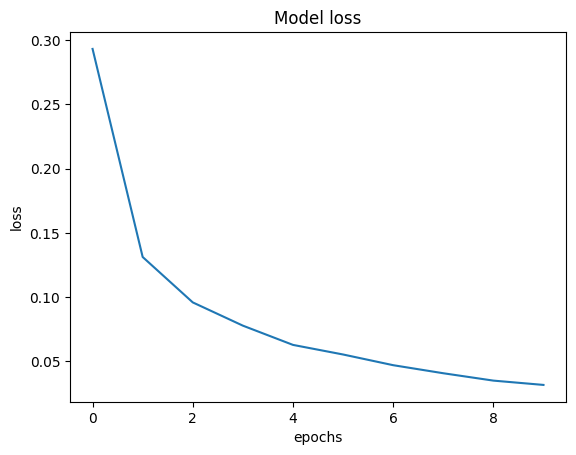

In [42]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

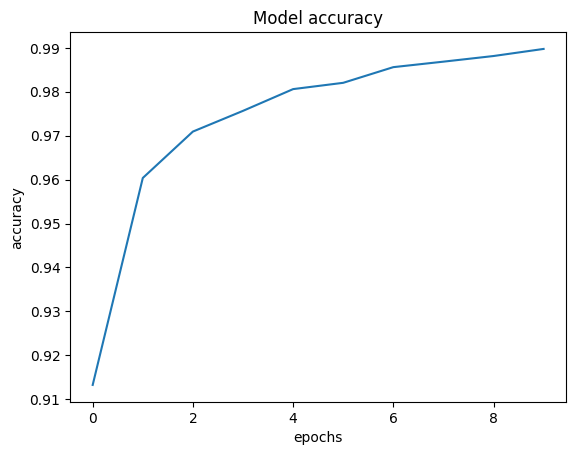

In [43]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [44]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1131
Loss of the Test dataset is: 0.10095120966434479
Accuracy of the test dataset is: 0.9747999906539917


Save the model weights

In [45]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

 a. Improve the test accuracy

In [46]:
def build_and_train_model(neurons_layer1, neurons_layer2, epochs):
    """
    Builds and trains a sequential model with specified hyperparameters.

    Args:
        neurons_layer1 (int): Number of neurons in the first dense layer.
        neurons_layer2 (int): Number of neurons in the second dense layer.
        epochs (int): Number of training epochs.

    Returns:
        tuple: A tuple containing the trained model and its history.
    """
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(neurons_layer1, activation='relu'))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(32, activation='relu')) # Keeping the third dense layer at 32 neurons for now
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(f"Training with {neurons_layer1} neurons in layer 1, {neurons_layer2} in layer 2, and {epochs} epochs...")
    history = model.fit(new_train_data, new_train_target, epochs=epochs, verbose=0) # Set verbose to 0 to avoid printing training progress for each epoch

    loss, acc = model.evaluate(new_test_data, new_test_target, verbose=0)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

    return model, history

In [47]:
# Define the hyperparameter values to try
neurons_layer1_options = [64, 128]
neurons_layer2_options = [32, 64]
epochs_options = [5, 10]

best_accuracy = 0
best_hyperparameters = {}

# Iterate through all combinations of hyperparameters
for neurons1 in neurons_layer1_options:
    for neurons2 in neurons_layer2_options:
        for epoch_count in epochs_options:
            print(f"\nTrying hyperparameters: Layer 1 Neurons = {neurons1}, Layer 2 Neurons = {neurons2}, Epochs = {epoch_count}")

            # Build and train the model with the current hyperparameters
            model, history = build_and_train_model(neurons1, neurons2, epoch_count)

            # Evaluate the model and get the test accuracy
            loss, acc = model.evaluate(new_test_data, new_test_target, verbose=0)
            print(f"Test Accuracy for this combination: {acc:.4f}")

            # Check if this combination has the best accuracy so far
            if acc > best_accuracy:
                best_accuracy = acc
                best_hyperparameters = {
                    'neurons_layer1': neurons1,
                    'neurons_layer2': neurons2,
                    'epochs': epoch_count
                }

print("\n=====================================")
print(f"Best Test Accuracy found: {best_accuracy:.4f}")
print("Best Hyperparameters:")
print(best_hyperparameters)
print("=====================================")


Trying hyperparameters: Layer 1 Neurons = 64, Layer 2 Neurons = 32, Epochs = 5
Training with 64 neurons in layer 1, 32 in layer 2, and 5 epochs...
Test Loss: 0.0996, Test Accuracy: 0.9708
Test Accuracy for this combination: 0.9708

Trying hyperparameters: Layer 1 Neurons = 64, Layer 2 Neurons = 32, Epochs = 10
Training with 64 neurons in layer 1, 32 in layer 2, and 10 epochs...
Test Loss: 0.0964, Test Accuracy: 0.9744
Test Accuracy for this combination: 0.9744

Trying hyperparameters: Layer 1 Neurons = 64, Layer 2 Neurons = 64, Epochs = 5
Training with 64 neurons in layer 1, 64 in layer 2, and 5 epochs...
Test Loss: 0.0880, Test Accuracy: 0.9732
Test Accuracy for this combination: 0.9732

Trying hyperparameters: Layer 1 Neurons = 64, Layer 2 Neurons = 64, Epochs = 10
Training with 64 neurons in layer 1, 64 in layer 2, and 10 epochs...
Test Loss: 0.0981, Test Accuracy: 0.9768
Test Accuracy for this combination: 0.9768

Trying hyperparameters: Layer 1 Neurons = 128, Layer 2 Neurons = 32

b. Add L1 and L2 regularization terms to the model and retrain the model.

In [48]:
from tensorflow.keras.regularizers import l1_l2

def build_and_train_model_with_regularization(neurons_layer1, neurons_layer2, epochs, l1_reg=0.0, l2_reg=0.0):
    """
    Builds and trains a sequential model with specified hyperparameters and regularization.

    Args:
        neurons_layer1 (int): Number of neurons in the first dense layer.
        neurons_layer2 (int): Number of neurons in the second dense layer.
        epochs (int): Number of training epochs.
        l1_reg (float): L1 regularization strength.
        l2_reg (float): L2 regularization strength.

    Returns:
        tuple: A tuple containing the trained model and its history.
    """
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(neurons_layer1, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))) # Add regularization
    model.add(Dense(neurons_layer2, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))) # Add regularization
    model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))) # Add regularization
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(f"Training with {neurons_layer1} neurons in layer 1, {neurons_layer2} in layer 2, {epochs} epochs, L1={l1_reg}, L2={l2_reg}...")
    history = model.fit(new_train_data, new_train_target, epochs=epochs, verbose=0)

    loss, acc = model.evaluate(new_test_data, new_test_target, verbose=0)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

    return model, history

In [49]:
# Use the best hyperparameters found previously
best_neurons_layer1 = best_hyperparameters['neurons_layer1']
best_neurons_layer2 = best_hyperparameters['neurons_layer2']
best_epochs = best_hyperparameters['epochs']

# Define some L1 and L2 regularization values to try
l1_values = [0.001, 0.01]
l2_values = [0.001, 0.01]

print("Experimenting with L1 and L2 Regularization:")

# Train with L1 regularization only
for l1 in l1_values:
    print(f"\n--- Training with L1 Regularization = {l1} ---")
    model_l1, history_l1 = build_and_train_model_with_regularization(
        best_neurons_layer1,
        best_neurons_layer2,
        best_epochs,
        l1_reg=l1,
        l2_reg=0.0 # No L2 regularization
    )

# Train with L2 regularization only
for l2 in l2_values:
    print(f"\n--- Training with L2 Regularization = {l2} ---")
    model_l2, history_l2 = build_and_train_model_with_regularization(
        best_neurons_layer1,
        best_neurons_layer2,
        best_epochs,
        l1_reg=0.0, # No L1 regularization
        l2_reg=l2
    )

# Train with both L1 and L2 regularization
for l1 in l1_values:
    for l2 in l2_values:
        print(f"\n--- Training with L1={l1} and L2={l2} Regularization ---")
        model_l1_l2, history_l1_l2 = build_and_train_model_with_regularization(
            best_neurons_layer1,
            best_neurons_layer2,
            best_epochs,
            l1_reg=l1,
            l2_reg=l2
        )

print("\n--- Experimentation with L1 and L2 Regularization Complete ---")

Experimenting with L1 and L2 Regularization:

--- Training with L1 Regularization = 0.001 ---
Training with 64 neurons in layer 1, 64 in layer 2, 10 epochs, L1=0.001, L2=0.0...
Test Loss: 0.3985, Test Accuracy: 0.9482

--- Training with L1 Regularization = 0.01 ---
Training with 64 neurons in layer 1, 64 in layer 2, 10 epochs, L1=0.01, L2=0.0...
Test Loss: 1.0545, Test Accuracy: 0.7818

--- Training with L2 Regularization = 0.001 ---
Training with 64 neurons in layer 1, 64 in layer 2, 10 epochs, L1=0.0, L2=0.001...
Test Loss: 0.1845, Test Accuracy: 0.9716

--- Training with L2 Regularization = 0.01 ---
Training with 64 neurons in layer 1, 64 in layer 2, 10 epochs, L1=0.0, L2=0.01...
Test Loss: 0.3654, Test Accuracy: 0.9535

--- Training with L1=0.001 and L2=0.001 Regularization ---
Training with 64 neurons in layer 1, 64 in layer 2, 10 epochs, L1=0.001, L2=0.001...
Test Loss: 0.4240, Test Accuracy: 0.9466

--- Training with L1=0.001 and L2=0.01 Regularization ---
Training with 64 neuro

c. Visualize class-wise test dataset performance using a confusion matrix.

In [50]:
# We'll use the model trained with the best hyperparameters without regularization for this.
# If you want to use a different model (e.g., with regularization), please specify.

# First, build and train the best model without regularization
best_model, _ = build_and_train_model(
    best_hyperparameters['neurons_layer1'],
    best_hyperparameters['neurons_layer2'],
    best_hyperparameters['epochs']
)

# Make predictions on the test data
predictions = best_model.predict(new_test_data)

# The predictions are probabilities for each class. We need to get the class with the highest probability.
predicted_classes = np.argmax(predictions, axis=1)

Training with 64 neurons in layer 1, 64 in layer 2, and 10 epochs...
Test Loss: 0.1150, Test Accuracy: 0.9694
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [51]:
# Get the true labels for the test data by converting from one-hot encoding
true_classes = np.argmax(new_test_target, axis=1)

In [52]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 970    0    1    0    1    0    3    1    1    3]
 [   1 1114    2    1    0    1    4    1   11    0]
 [   5    2  986    7    2    0    2   17   11    0]
 [   0    0    2  985    0   12    0    5    6    0]
 [   4    3    3    0  926    2    8   10    1   25]
 [   2    0    0    7    0  872    5    1    4    1]
 [   5    1    1    1    5    5  936    3    1    0]
 [   1    5    8    0    1    1    0  999    2   11]
 [   5    0    1    5    2   19    4    6  929    3]
 [   2    2    0    7    3    9    1    6    2  977]]


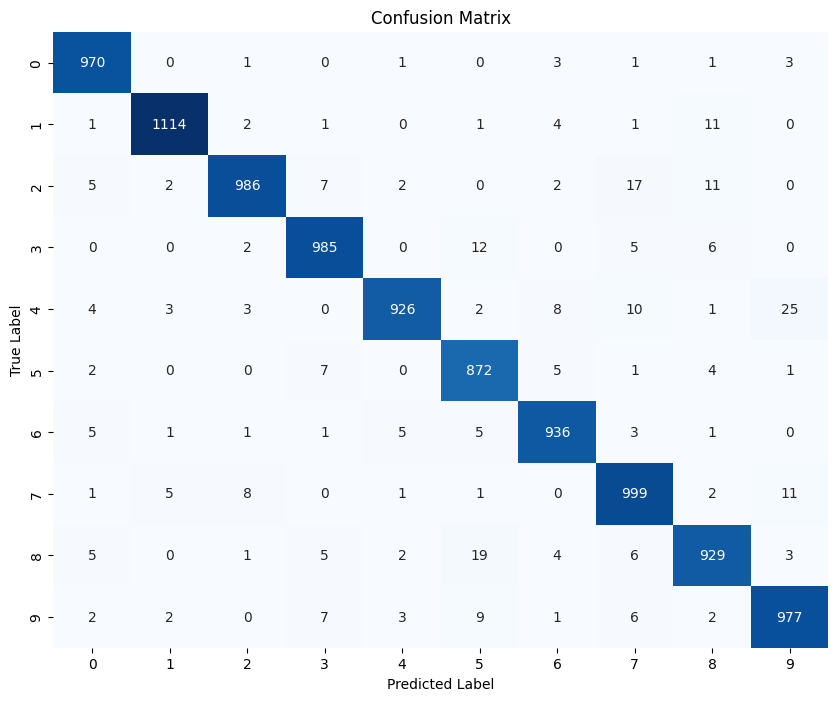

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()